Workshop 2 - Plot the Data

Hacking Activity 1 - Talking to your Nicla

Hacking Exercise 1

In [100]:
import serial
import serial.tools.list_ports
import pandas as pd
import numpy as np

# Connect to the Nicla
ports = serial.tools.list_ports.comports()
for n in ports:
    # Print the names of the devices connected to the computer - your Nicla will be one of them.
    print(n.description)
    print(n.device)
    # If your computer is a Mac, you can use the following lines to automatically set the Serial port:
    # if 'Nicla' in n.description:
    #     dev = n.device

# You need to change the line below to the right Serial port for your Nicla:
dev = 'COM3'

# See baudrate=115200 below? This is the speed at which the Nicla communicates with the computer. Don't change it.
nicla = serial.Serial(port=dev, baudrate=115200, timeout=.1)

USB Serial Device (COM3)
COM3


Hacking Exercise 2

In [101]:
# Number of readings to take
n_readings = 200
column_titles = ['time', 'temp', 'pressure', 'gas']

# Clear the buffer for the Nicla serial port - it may help to comment these 2 lines out, it may help to keep them!
nicla.flush()
nicla.reset_input_buffer()

# Start collecting data - tell the Nicla how many data points to take
nicla.write(bytes("{f0}".format(f0=n_readings), 'utf-8'))

# Create somewhere to store the data
data_table = np.zeros((n_readings, len(column_titles)))
# Uncomment the line below if you'd like to see what the data_table looks like - google "numpy zeros" to learn what the function is doing.
# print(data_table)

# Get the data from the Nicla
for n in range(n_readings):
    # Read data from the Nicla up to '/n'
    data = nicla.readline()
    # Split the line read from the Nicla every time it finds a ','
    data = np.fromstring(data, sep=',')
    # Unless the data has the correct length, ignore it
    if len(data) == len(column_titles):
        data_table[n,:] = data

# Close the serial port
nicla.close()

# Put the data in a DataFrame
tpg_data = pd.DataFrame(data_table, columns=column_titles)
tpg_data

,time,temp,pressure,gas
0,0.0,0.00,0.00,0.0
1,0.0,0.00,0.00,0.0
2,0.0,0.00,0.00,0.0
3,0.0,0.00,0.00,0.0
4,0.0,0.00,0.00,0.0
...,...,...,...,...
195,634.0,31.18,1010.26,17289.0
196,638.0,31.18,1010.24,17289.0
197,640.0,31.18,1010.24,17289.0
198,643.0,31.18,1010.24,17289.0


Python Activity 1 - Pandas

1.1 - Pandas? DataFrames?

In [102]:
# Can access individual columns of the DataFrame by typing the name of the column:
tpg_data["temp"]

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
195    31.18
196    31.18
197    31.18
198    31.18
199    31.18
Name: temp, Length: 200, dtype: float64

In [103]:
# Can create a new DataFrame by selecting a part of another DataFrame
data_filtered = tpg_data[["time", "temp"]]
data_filtered

,time,temp
0,0.0,0.00
1,0.0,0.00
2,0.0,0.00
3,0.0,0.00
4,0.0,0.00
...,...,...
195,634.0,31.18
196,638.0,31.18
197,640.0,31.18
198,643.0,31.18


In [104]:
# Using mathematical operators (where temp > 0):
tpg_data[tpg_data["temp"] > 0]

,time,temp,pressure,gas
9,1.0,31.15,1010.43,18096.0
14,76.0,31.18,1010.28,17275.0
15,79.0,31.18,1010.26,17346.0
16,82.0,31.18,1010.26,17346.0
17,85.0,31.18,1010.26,17346.0
...,...,...,...,...
195,634.0,31.18,1010.26,17289.0
196,638.0,31.18,1010.24,17289.0
197,640.0,31.18,1010.24,17289.0
198,643.0,31.18,1010.24,17289.0


Python Exercise 1

In [105]:
# Loading the following DataFrame
data_exercise1 = tpg_data
data_exercise1

,time,temp,pressure,gas
0,0.0,0.00,0.00,0.0
1,0.0,0.00,0.00,0.0
2,0.0,0.00,0.00,0.0
3,0.0,0.00,0.00,0.0
4,0.0,0.00,0.00,0.0
...,...,...,...,...
195,634.0,31.18,1010.26,17289.0
196,638.0,31.18,1010.24,17289.0
197,640.0,31.18,1010.24,17289.0
198,643.0,31.18,1010.24,17289.0


1. Selection by Location

In [106]:
# This will return the first 3 rows of the DataFrame data_exercise - note that Python starts counting from 0 and ignore the last number you're requesting here.
data_exercise1.iloc[0:3]

,time,temp,pressure,gas
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0


2. Selection by Index

In [107]:
# this will return rows that have an index with a value between 0 and 20 - again, Python starts at 0, but keeps you on your toes by including the last number you're requesting.
data_exercise1.loc[0:20]

,time,temp,pressure,gas
0,0.0,0.00,0.00,0.0
1,0.0,0.00,0.00,0.0
2,0.0,0.00,0.00,0.0
3,0.0,0.00,0.00,0.0
4,0.0,0.00,0.00,0.0
5,0.0,0.00,0.00,0.0
6,0.0,0.00,0.00,0.0
7,0.0,0.00,0.00,0.0
8,0.0,0.00,0.00,0.0
9,1.0,31.15,1010.43,18096.0


In [108]:
# Defining a new DataFrame
data_exercise2 = tpg_data[tpg_data["temp"] > 0]
data_exercise2

,time,temp,pressure,gas
9,1.0,31.15,1010.43,18096.0
14,76.0,31.18,1010.28,17275.0
15,79.0,31.18,1010.26,17346.0
16,82.0,31.18,1010.26,17346.0
17,85.0,31.18,1010.26,17346.0
...,...,...,...,...
195,634.0,31.18,1010.26,17289.0
196,638.0,31.18,1010.24,17289.0
197,640.0,31.18,1010.24,17289.0
198,643.0,31.18,1010.24,17289.0


In [109]:
data_exercise2.iloc[0:5]

,time,temp,pressure,gas
9,1.0,31.15,1010.43,18096.0
14,76.0,31.18,1010.28,17275.0
15,79.0,31.18,1010.26,17346.0
16,82.0,31.18,1010.26,17346.0
17,85.0,31.18,1010.26,17346.0


In [110]:
data_exercise2.loc[0:20]

,time,temp,pressure,gas
9,1.0,31.15,1010.43,18096.0
14,76.0,31.18,1010.28,17275.0
15,79.0,31.18,1010.26,17346.0
16,82.0,31.18,1010.26,17346.0
17,85.0,31.18,1010.26,17346.0
18,89.0,31.18,1010.26,17346.0
19,91.0,31.18,1010.26,17346.0
20,94.0,31.18,1010.26,17346.0


Python Activity 2 - Plotting Your Data

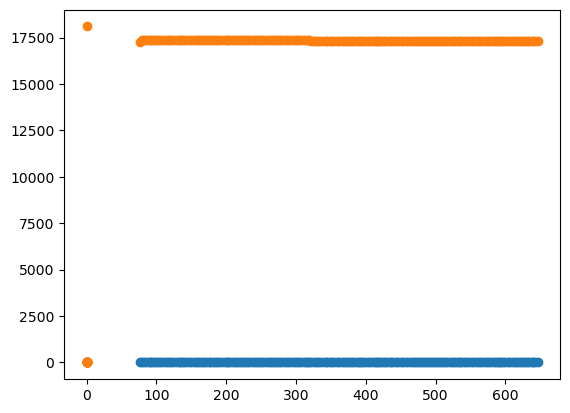

In [111]:
import matplotlib as mpl
mpl.rcParams['axes.formatter.useoffset'] = False    # Remove annoying auto-offset
import matplotlib.pyplot as plt

# Create a figure
fig = plt.figure()
# Add an axis to the figure
ax = fig.add_subplot(111)
# Tell the axis to plot the data - time on the x-axis, temperature on the y-axis
ax.scatter(tpg_data['time'], tpg_data['temp'])
# Tell the axis to plot the data - time on the x-axis, gas reading on the y-axis
ax.scatter(tpg_data['time'], tpg_data['gas'])
# Show the figure - not strictly necessary in jupyter notebook, but essential if you're writing a .py file
plt.show()

2.2 - Making the Plot Clearer

<>:8: SyntaxWarning: invalid escape sequence '\c'
<>:8: SyntaxWarning: invalid escape sequence '\c'
C:\Users\micha\AppData\Local\Temp\ipykernel_22484\1345782934.py:8: SyntaxWarning: invalid escape sequence '\c'
  ax.set_ylabel('Gas Sensor Reading (a.u.) / Temperature ($^\circ$C)')


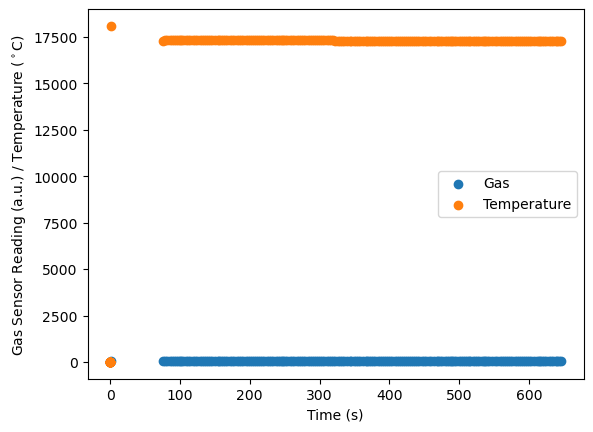

In [112]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(tpg_data['time'], tpg_data['temp'])
ax.scatter(tpg_data['time'], tpg_data['gas'])

# Add some labels and a legend to the plot
ax.set_xlabel('Time (s)')
ax.set_ylabel('Gas Sensor Reading (a.u.) / Temperature ($^\circ$C)')
plt.legend(['Gas', 'Temperature'])
plt.show()

2.3 - Adding a Second Y-Axis

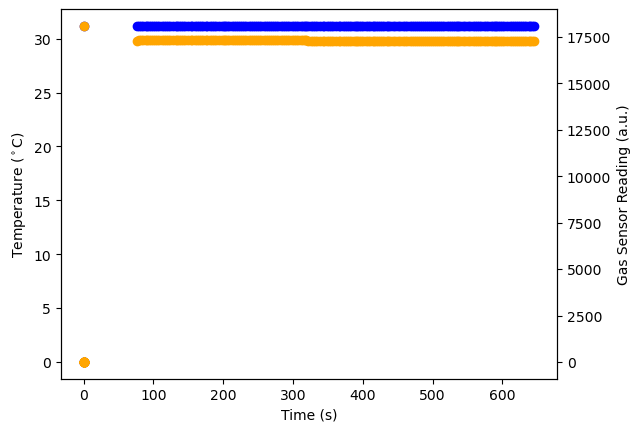

In [113]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(tpg_data['time'], tpg_data['temp'], color='blue')
ax.set_ylabel(r'Temperature ($^\circ$C)')

# Add a second y-axis to the plot              
ax2 = ax.twinx()
# Plot a second data set on the second y-axis
ax2.scatter(tpg_data['time'], tpg_data['gas'], color='orange')
ax2.set_ylabel(r'Gas Sensor Reading (a.u.)')

# Changing font size of tick labels
plt.xticks(fontsize = 10)

ax.set_xlabel('Time (s)')
plt.show()

Python Exercise 2

1. Change the font size of the tick labels on your plot
2. Change the values of the x- and y-limits so you can clearly read both datasets
3. Add a legend for both datasets to the graph - set its position and font size and think about how to make it clear which dataset belongs to which axis.

2.4 - Multiple Subplots

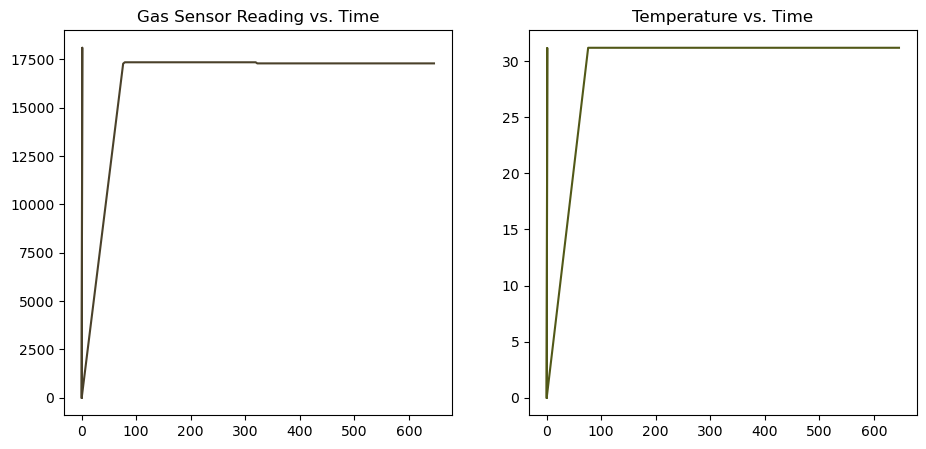

In [117]:
fig = plt.figure(figsize=(11,5))
# Create a subplot with 1 row and 2 columns - ax1 is in position 1
ax1 = fig.add_subplot(121)
# Create a subplot with 1 row and 2 columns - ax2 is in position 2
ax2 = fig.add_subplot(122)

# c=colour, it's used in the format c=(red, green, blue) where each value is between 0 and 1
# e.g. 111 = 111/255 = 0.43529412...
ax1.plot(tpg_data['time'], tpg_data['gas'], c=(0.29019608, 0.25490196, 0.16470588))
ax1.set_title('Gas Sensor Reading vs. Time')

ax2.plot(tpg_data['time'], tpg_data['temp'], c=(0.31764706, 0.34509804, 0.09019608))
ax2.set_title('Temperature vs. Time')

plt.show()

2.5 - Data Filtering Using Pandas 1 - Filtering by Value

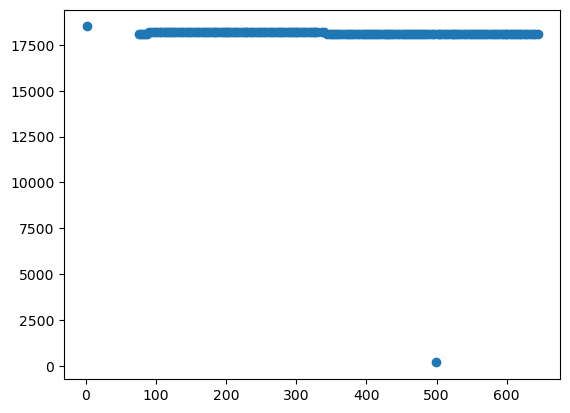

In [65]:
tpg_data_filter = tpg_data[tpg_data['gas'] > 0]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(tpg_data_filter['time'], tpg_data_filter['gas'])
plt.show()

2.6 - Data Filtering Using Pandas 2 - Statistical Filtering

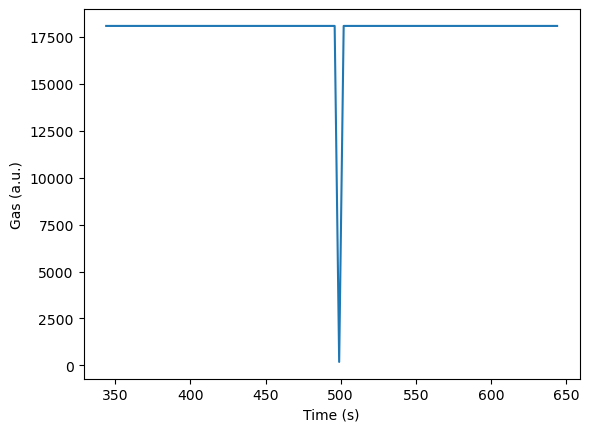

In [89]:
lower_bound = tpg_data['gas'].quantile(0.07)
upper_bound = tpg_data['gas'].quantile(0.57)

# Here's the tricky bit - we ignore values that are below the lower bound or above the upper bound - ask ChatGPT what the code is doing!
data_clean = tpg_data[(tpg_data['gas'] > lower_bound) & (tpg_data['gas'] < upper_bound)]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(data_clean['time'], data_clean['gas'])
ax.set_xlabel('Time (s)')
ax.set_ylabel('Gas (a.u.)')
plt.show()

2.7 - Saving Your Graph

In [90]:
# Save graph - resolution @ 200 dots per inch, tight bounding box
filename = 'plot_name.png'

# The code below will save your figure to the directory where this code is stored.
plt.savefig(filename, dpi=200, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>